In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Load the dataset
df = pd.read_csv('spam_assassin.csv')

# Cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Apply the cleaning function to the email text column (assuming the column name is 'email')
df['text'] = df['text'].apply(clean_text)

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()

# Assuming the target column is 'label' (adjust this based on your dataset)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Train a classifier with SMOTE data
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_smote, y_smote)
y_pred_smote = clf_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# Apply NearMiss
nearmiss = NearMiss()
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train, y_train)

# Train a classifier with NearMiss data
clf_nearmiss = RandomForestClassifier(random_state=42)
clf_nearmiss.fit(X_nearmiss, y_nearmiss)
y_pred_nearmiss = clf_nearmiss.predict(X_test)
accuracy_nearmiss = accuracy_score(y_test, y_pred_nearmiss)

# Print the accuracy of both methods
print(f'Accuracy with SMOTE: {accuracy_smote:.2f}')
print(f'Accuracy with NearMiss: {accuracy_nearmiss:.2f}')


Accuracy with SMOTE: 0.99
Accuracy with NearMiss: 0.95


Distribution of target labels:
0    3900
1    1896
Name: target, dtype: int64


<AxesSubplot:title={'center':'Class Distribution'}>

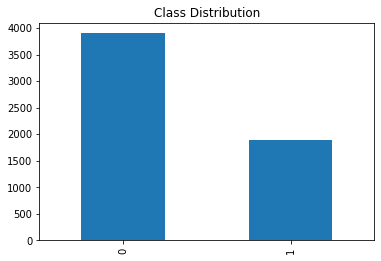

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam_assassin.csv')

# Assuming the target column is 'label' (adjust this based on your dataset)
label_counts = df['target'].value_counts()

# Print the distribution of the target labels
print("Distribution of target labels:")
print(label_counts)

# Visualize the distribution using a bar plot
label_counts.plot(kind='bar', title='Class Distribution')
